<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>

<font color='blue'>
<br />
Мария, рад приветствовать тебя! <br />
<br />    

<br />
Меня зовут Николай. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

#### Инструкция по выполнению проекта
- Загрузка и подготовка данных
- Исследовать баланс классов, обучить модель без учёта дисбаланса
- Улучшить качество модели, учитывая дисбаланс классов. Обучить разные модели и найдити лучшую. 
- Провести финальное тестирование

# 1. Подготовка данных

Для начала импортируем библиотеки, получим все данные и рассмотрим общую информацию об импортированных данных.

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm


data = pd.read_csv('/datasets/Churn.csv')

In [2]:
data.shape

(10000, 14)

In [3]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Мы видим наличие пропусков в столбце "Tenure" (количество недвижимости у клиента). Заполним их медианой, этот метод является достаточно универсальным заполнителем пропусков для ML алгоритмов.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
решение понятно, но обоснования ему нет(((( Почему именно так решил заполнить? как это повлияет на результат моделирования? <br>
<br> Возможно, что групповая (например по географии) медиана также не принесла бы большой ошибки. А может взять и удалить, чтобы не "искушаться"..Тут понятно, что однозначного решения нет, как и алгоритма. Правило только одно (как в медицине) - НЕ нарведи. Т.е. принимаемое решение должно соотноситься с возможным ущербом на конечный результат. В нашем случае ущерб от медианного заполнения ниже от ущерба удалить данные?. Причём выше/ниже - это только на чуйке/жизенном опыте смого аналитика.<br>
Интересная это работа - быть DS-аналитиком)<br><br>
    
В данном случае, спарведливости ради, если построить распределение ДО и ПОСЛЕ заполнения пропусков, то увидим, что оно изменится. Т.е. данный подход несколько исказит инфо, а значит и результат моделирования будет уже не очень.<br> Тут лучшим способом будет - заполнение случайным числом.<br>
    
Ещё вараинт:<br> удалить пропущенные строки. А по окнчании построения модели, вывести важность факторов самой модели. И если фактор tenure окажется не значим, то как в принципе удалить его из моделирования, а первоначально удалённые строки - вернуть.

In [6]:
mediana = data['Tenure'].median()
data['Tenure'] = data['Tenure'].fillna(mediana)

In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Также можно удалить ненужные стобцы, которые вряд ли повлияют на вероятность ухода клиента из банка: "Surname"(фамилия), "RowNumber"(индекс строки в данных).

In [8]:
data = data.drop(columns=['Surname', 'RowNumber'])
data['CustomerId'].nunique() == data.shape[0]

True

### Вывод: 
- Представленные данные состоят из 14 признаков и 10000 объектов. Целевым признаком, в данном случае, является Exited — факт ухода клиента. Целевой признак является категориальным. Задача относится к классу "обучение с учителем"

- Заполнили пропуски медианой

- Удалили ненужные столбцы для дальнейшего решение задачи

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
Хорошо, только ещё один столбец - id клиента - надо тоже удалиь будет)

# 2. Исследование задачи

Зафиксируем псевдослучайность для всех используемых в проекте алгоритмов.

In [9]:
rnd_state = 12345

Теперь разделим на обычные признаки и целевые. Применим для категориальных признаков метод OHE:

In [10]:
data_ohe = pd.get_dummies(data, drop_first=True)
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
ок)

Разбиваем представленные данные на три выборки: 60% - обучающая, 20% - валидационная, 20% - тестовая.

In [11]:
data_train, data_valid = train_test_split(data_ohe, test_size=0.4, random_state=rnd_state)
data_valid, data_test = train_test_split(data_valid , test_size=0.5, random_state=rnd_state)

In [12]:
features_train = data_train.drop(columns=['Exited'])
target_train = data_train['Exited']

features_valid = data_valid.drop(columns=['Exited'])
target_valid = data_valid['Exited']

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
понятно, можно было ещё проконтролировать размер новых выборок)
<font color='red'>    
Потом я увидел, что не используется кросс-валидация. Значит тебе понадобится три выборки<br>
- Обучаем на обучающей вывборке<br>
- Подбираем гиперпараметры для моделй по валидационной выборке<br>
- тестируем результат - на тестовой выборке<br><br>
    
<font color='black'> - готово

Проверим дисбаланс целевого класса:

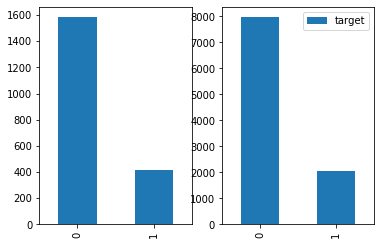

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2)
target_valid.value_counts().plot(kind='bar', ax=ax1, label='valid')
target.value_counts().plot(kind='bar', ax=ax2, label='target')
plt.legend()

#### Будем использовать следующие модели: 
Рассмотрим два алгоритма классификации: "Модель случайного леса", "Модель Логистической регрессии" без учёта дисбаланса. 

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
принято)

In [14]:
#Модель "Случайного леса"
for estim in range(10, 101, 10):
    model = RandomForestClassifier(n_estimators=estim, random_state=rnd_state)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(predicted_valid, target_valid)
    print(estim, f1)

10 0.5374449339207048
20 0.5484848484848485
30 0.5545454545454546
40 0.5684210526315789
50 0.5727136431784108
60 0.5748148148148149
70 0.5739910313901345
80 0.574436090225564
90 0.5727136431784108
100 0.5692771084337349


In [15]:
#Модель "Логистическая регрессии"

def logistic_regression():
    model = LogisticRegression(solver='liblinear', random_state=rnd_state)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(predicted_valid, target_valid)
print(f1)

0.5692771084337349


Проверим метрику f1 на моделе "Случайный лес" без учета дисбаланса на наилучших параметрах (заодно и roc_auc): 

In [16]:
model = RandomForestClassifier(n_estimators=60, random_state=rnd_state)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(predicted_valid, target_valid)
print(f1)

0.5748148148148149


In [17]:
roc_auc = roc_auc_score(predicted_valid, target_valid)
print(roc_auc)

0.8131748785023362


### Вывод:
- Применили для категориальных признаков метод OHE

- Проверили дисбаланс целевого класса

- Рассмотрели два алгоритма классификации: "Модель случайного леса", "Модель Логистической регрессии" без учёта дисбаланса.

- Модель "Случайного леса" наиболее подходящая для решения дальнейшей задачи

- Проверили значение f1 на моделе "Случайного леса" с лучшими параметрами без учета дисбаланса, f1 недостаточен. 

- Посмотрели на качество модели с помощью roc_auc

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
Хорошая работа)

# 3. Борьба с дисбалансом

С дисбалансом будем бороться с помощью техник: upsampling и downsampling.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
план понятен)<br><font color='red'>
Только есть один момент:<br>
Ты не используешь кросс-валидацию. Значит надо применить три выборки для поиска модели. 
    
<font color='black'> - Вроде бы переделала

In [18]:
def upsampling(features, target, shuffled=True, seed=20):
    
    np.random.seed(seed=21)
    target_min_value = target_train.value_counts().sort_values().index[0]
    target_max_value = target_train.value_counts().sort_values().index[1]
    min_class_cnt = target_train.value_counts().min()
    max_class_cnt = target_train.value_counts().max()
    
    coef = max_class_cnt / min_class_cnt - 1
    idx = np.random.randint(0,
                            min_class_cnt,
                            size=np.round(min_class_cnt*coef).astype(int))
    
    features_new = features_train[target==target_min_value].values[idx]
    target_new = target_train[target==target_min_value].values[idx]
    
    features_up = pd.concat([features]+[pd.DataFrame(data=features_new, index=idx, columns=features.columns)])
    target_up = pd.concat([target]+[pd.Series(data=target_new, index=idx)])
    
    if shuffled:
        return shuffle(features_up, target_up, random_state=seed)
    else:
        return features_up, target_up

((9608, 12), (9608,))

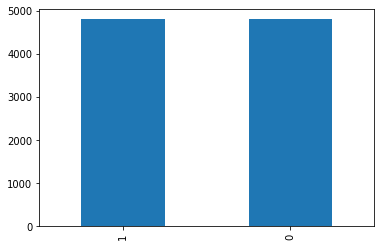

In [19]:
features_train_up, target_train_up = upsampling(features_train, target_train)

target_train_up.value_counts().plot(kind='bar')
features_train_up.shape, target_train_up.shape

In [20]:
model = RandomForestClassifier(n_estimators=estim, max_depth=20, random_state=rnd_state)
model.fit(features_train_up, target_train_up)
predicted_valid = model.predict(features_valid)
f1 = f1_score(predicted_valid, target_valid)
print(f1)

0.592087312414734


<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></font><br />
<font color='red'>
<br/> здесь идёт обучение на валид. а потом и проверка тоже на валид. Поэтом и 1 в ответе)<br>
Обучать здесь тоже надо на трэйн. А проверять на валид
    
<font color='black'> - готово! спасибо =)

In [21]:
roc_auc = roc_auc_score(predicted_valid, target_valid)
print(roc_auc)

0.7848005275304978


### Вывод:
- Поборолись с дисбалансом с помощью техники: upsampling  

- Побороться получилось, баланс выровнили =) 

- Посчитали f1 уже с учетом баланса, получили нужный результат. 

# 4. Тестирование модели

Проверяем выбранную нами модель "Случайного леса" на тестовой выборке, с учетом баланса. 

In [22]:
features_test = data_ohe.drop('Exited', axis=1)
target_test = data_ohe['Exited']

model = RandomForestClassifier(n_estimators=60, max_depth=10, random_state=rnd_state)
model.fit(features_train, target_train)

predicted_test = model.predict(features_test)
f1 = f1_score(predicted_test, target_test)
print(f1)

0.6371960846226713


In [23]:
roc_auc = roc_auc_score(predicted_test, target_test)
print(roc_auc)

0.8885120371940817


### Вывод:

С поставленной задачей справились, результат получился не ниже, чем 0.59. Я

Выбрали именно модель "Случайный лес" с заданными параметрами, так как f1-мера и roc_auc при таких параметрах наиболее высокий из всех рассмотренных моделей.

roc_auc до учета дисбаланса был выше, чем с учетом и на тестовой выборке. Но до идеала далеко =) 

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
<br/> Мария, добротная и качественная работа! <br>
Подготовка данных, работа с диссбалансом и исследование моделей и поиск парамтров для них - ничего не забыто <br>
И видно, что проделана рабочая аналитическая работа: результативно и с выводами.<br>  

<font color='green'>
Если говорить, что можно ещё улучшить в подобных проектах, то я бы выделили такие моменты:<br>
1) После подбора параметров модели, когда уже настаёт этап тестировани. Можно обучить на обобщённой выборке (трайн + валидация) ну и тестировать потом. Это может ещё прибавить точности.(если не использовать кросс-валидации)<br>
    
2) Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))<br>
    
3) Наверное ты в курсе, просто хочу напомнить: F1 и AUC - отличные метрики, но нужно держать в голове, что это лишь бобщённые характеристики. А в реальной практике бизнесу часто важно знать детали самой ошибки - из каких ошибок/успехов она складывается. И в этом случае очень кстати будут меры полноты и точности. Рассмотри возможность их использования для своих проектов. Только через них можно выйти на финансовые возможности модели. Ведь перед запуском её в бой, будет сравнение стоимости создания и поддержки модели со стомостью "оставить как есть" <br>
    
4) предварительная работа с данными:<br>
- На этом этапе нужно БОЛЬШЕ аргументации, для принимаемых решений.<br>
- Также, можно организовать для себя некую систему работы с данными:<br>
 
Например, алгоритм такой может:<br>
1) анализ аномалий <br>
2) анализ пропусков <br>
3) проверка дубликатов<br>
4) Анализ факторов: исходя из типа шкалы, могут применять следующие графический и аналитический анализы:<br>
- колличественная-колличественная: аналитически методод - корреляции, графический - скатерплот.<br>
- колличественная-номинальная: аналитически методод - проверка гипотез (стьюдент, маннауитни), графический - боксплот.<br>
- номинальная-номинальная: аналитически методод - Хи-квадрат, графический - круговая диаграмма<br>

<font color='red'>   
Что ещё лучше сделать в этой работе:<br>
1) надо разбить на три выборки<br>
2) И перестроить модели с учётом этого<br>
   - Обучаем на обучающей вывборке<br>
   - Подбираем гиперпараметры для моделй по валидационной выборке<br>
   - тестируем результат - на тестовой выборке<br><br>
<font color='green'>    

БУДУ ЖДАТЬ КОРРЕКТИРОВОК!

</b></font>

Николай, приветствую!) Спасибо за комментарии, переделала те моменты, которые ты попросил) 
Рекомендации постараюсь в последующих задачах учесть =) 

У меня возник вопрос, я применили в первом варианте кросс-валидизацию. 
Ты написал в комментариях, что я ее не использую в пункте "Борьба с дисбалансом". Я правильно понимаю, что кросс-валидизацию надо было применить в этих пунктах? 
#А я просто применила на выборках test и train? А сам метод кросс валидизации в этом проекте применен верно? 

Заранее спасибо за ответ! =) 

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></font><br />
<font color='green'>
Тут можно или/или. Ведь эти провекри нужны для чего? чтобы подобрать параметры модели. А проверять уже на чистой, не замеченной в обучении и подборе параметров выборке. Чтобы иметь возможность честно оценить качество прогноза.<br>

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></font><br />
<font color='green'>
Мария, хорошая работа на доработке.<br>
Спасибо, что так отреагировала на мои комментарии<br>
Метод кросс-валидации не заметил у тебя( <br>   <font color='red'>
Подскажи, чем могу ещё помочь?
Николай.

<font color='black'> - Спасибо, ты все круто объяснил =) Теперь стало все гораздо яснее. Надеюсь, что теперь все ок =)

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></font><br />
<font color='green'>
Мария, привет!<br>
Спасибо за отклик)<br>
Тогда до новых встреч) УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

In [24]:
#cv = StratifiedKFold(n_splits=5, random_state=rnd_state)
#Ты написал в комментариях, что я ее не использую в пункте "Борьба с дисбалансом". 

#features_test = data_ohe.drop('Exited', axis=1)
#target_test 
#Код такой: 
#def upsampling(features, target, shuffled=True, seed=20):
    #np.random.seed(seed)
    #target_min_value = target.value_counts().sort_values().index[0]
    #target_max_value = target.value_counts().sort_values().index[1]
    #min_class_cnt = target.value_counts().min()
    #max_class_cnt = target.value_counts().max()
    
    #coef = max_class_cnt / min_class_cnt - 1
    #idx = np.random.randint(0,
    #                       min_class_cnt,
    #                      size=np.round(min_class_cnt*coef).astype(int))
    
    #features_new = features[target==target_min_value].values[idx]
    #target_new = target[target==target_min_value].values[idx]
    
    #features_up = pd.concat([features]+[pd.DataFrame(data=features_new, index=idx, columns=features.columns)])
    #target_up = pd.concat([target]+[pd.Series(data=target_new, index=idx)])
    
    #if shuffled:
    #    return shuffle(features_up, target_up, random_state=seed)
    #else:
    #    return features_up, target_up

In [25]:
#features_train_up, target_train_up = upsampling(features_train, target_train)

#target_train_up.value_counts().plot(kind='bar')
#features_train_up.shape, y_train_up.shape

#Я правильно понимаю, что кросс-валидизацию надо было применить в этих пунктах? 
#А я просто применила на выборках test и train? А сам метод кросс валидизации в этом проекте применен верно? 

In [26]:
#def best_model (models, parametrs, features, target, cv, seed=SEED):
    #grid = GridSearchCV(model, param_grid=parametrs, cv=cv, scoring='f1')
    #grid.fit(features, target)
    #best_res = pd.DataFrame(grid.cv_results_).query('rank_test_score==1').reset_index().iloc[0, :]    
    #return best_res

In [27]:
#models = []
#parametrs = []

#forest_models = RandomForestClassifier(random_state=SEED)
#forest_models_parametrs = {'max_features': list(range(1, X.shape[1]+1)),
#             'n_estimators': [100]
#            }

#models.append(forest_models)
#params.append(forest_models_parametrs )

#logitstic_models = LogisticRegression(random_state=SEED, solver='liblinear')
#logitstic_models_parametrs = {'C': np.logspace(-2, 1, 10)}

#models.append(logitstic_models )
#params.append(logitstic_models_parametrs)

In [28]:
#cols = ['mean_fit_time', 'mean_test_score', 'std_test_score', 'params']
#d = []

#for m, p in tqdm.tqdm(zip(models, params),total = len(params)):
#    d.append(best_model(m, p, features_train, target_train, cv)[cols])

#res = pd.DataFrame(data=d, index=['Forest', 'Logit'], columns=cols)
#res

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*